기존에 하려던 MTCNN+FaceNet 방식은 verification 방식이 아닌 것 같음.
미리 class들을 만들어주는 방식
https://jkisaaclee.kro.kr/keras/facenet/deep%20learning/computer%20vision/2019/10/01/how_to_develop_a_face_recognition_system_using_facenet_in_keras_ko/

# Deepface 써보자

In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=2b57e4e19266457ba96a8faa28aa38a4efa7609b44bf52b3eefb13fe13614e06
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [2]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


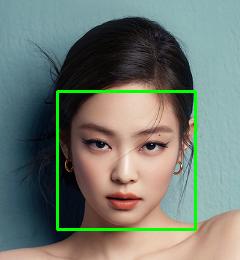

-1

In [4]:
# Importing OpenCV package
import cv2
from google.colab.patches import cv2_imshow

# Reading the image
img = cv2.imread('/content/gdrive/MyDrive/야이콘_NAMAN/jennie.png')

# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/야이콘_NAMAN/haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(img)


cv2.waitKey(0)

In [5]:
# Install packages
!pip install mtcnn
!pip install opencv-contrib-python

In [6]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [8]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

detector = MTCNN()
img = plt.imread('/content/gdrive/MyDrive/야이콘_NAMAN/BLACKBING.jpg')
faces = detector.detect_faces(img)
faces

1/1 [==============================] - 0s 228ms/step


[{'box': [300, 201, 52, 68],
  'confidence': 0.9990923404693604,
  'keypoints': {'left_eye': (310, 231),
   'right_eye': (334, 226),
   'nose': (324, 244),
   'mouth_left': (320, 256),
   'mouth_right': (337, 253)}},
 {'box': [428, 186, 49, 67],
  'confidence': 0.9980047345161438,
  'keypoints': {'left_eye': (438, 214),
   'right_eye': (463, 211),
   'nose': (452, 226),
   'mouth_left': (444, 239),
   'mouth_right': (463, 237)}},
 {'box': [145, 174, 54, 67],
  'confidence': 0.9948697090148926,
  'keypoints': {'left_eye': (158, 201),
   'right_eye': (184, 200),
   'nose': (172, 216),
   'mouth_left': (163, 227),
   'mouth_right': (182, 227)}},
 {'box': [557, 180, 51, 71],
  'confidence': 0.9920478463172913,
  'keypoints': {'left_eye': (569, 209),
   'right_eye': (593, 212),
   'nose': (578, 225),
   'mouth_left': (569, 236),
   'mouth_right': (587, 238)}}]

In [9]:
import copy

# Make a deep copy of the original faces list
faces_copy = copy.deepcopy(faces)

# Specify the expansion size (in pixels)
expansion_size = 20

# Modify the faces_copy list with expanded box information
for face_info in faces_copy:
    box = face_info['box']
    x, y, width, height = box

    # Expand the box in all directions
    expanded_box = [
        max(0, x - expansion_size),   # Ensure x is not negative
        max(0, y - expansion_size),   # Ensure y is not negative
        width + 2 * expansion_size,
        height + 2 * expansion_size
    ]

    # Update the 'box' key in the original faces_copy list
    face_info['box'] = expanded_box

# Print the modified faces_copy list
print(faces_copy)

[{'box': [280, 181, 92, 108], 'confidence': 0.9990923404693604, 'keypoints': {'left_eye': (310, 231), 'right_eye': (334, 226), 'nose': (324, 244), 'mouth_left': (320, 256), 'mouth_right': (337, 253)}}, {'box': [408, 166, 89, 107], 'confidence': 0.9980047345161438, 'keypoints': {'left_eye': (438, 214), 'right_eye': (463, 211), 'nose': (452, 226), 'mouth_left': (444, 239), 'mouth_right': (463, 237)}}, {'box': [125, 154, 94, 107], 'confidence': 0.9948697090148926, 'keypoints': {'left_eye': (158, 201), 'right_eye': (184, 200), 'nose': (172, 216), 'mouth_left': (163, 227), 'mouth_right': (182, 227)}}, {'box': [537, 160, 91, 111], 'confidence': 0.9920478463172913, 'keypoints': {'left_eye': (569, 209), 'right_eye': (593, 212), 'nose': (578, 225), 'mouth_left': (569, 236), 'mouth_right': (587, 238)}}]


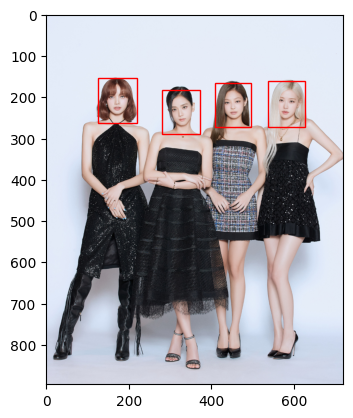

In [10]:
from google.colab.patches import cv2_imshow
from matplotlib import patches
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

for face in faces_copy:
    x,y,w,h = face['box']

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

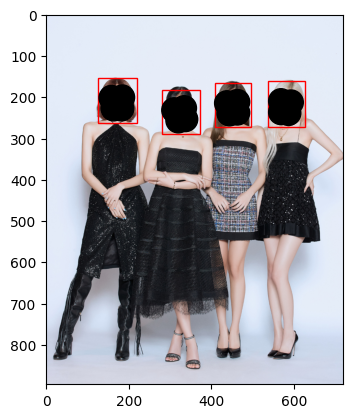

In [11]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

for face in faces_copy:
    x,y,w,h = face['box']

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # draw the dots
    for key, value in face['keypoints'].items():
        # create and draw dot
        dot = patches.Circle(value, radius=30, color='black')
        ax.add_patch(dot)

plt.show()

In [12]:
# draw each face separately
def draw_faces(img, result_list):
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        # plot face
        plt.imshow(img[y1:y2, x1:x2])
    # show the plot
    plt.show()

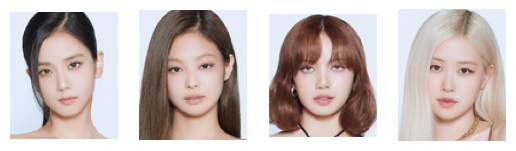

In [13]:
draw_faces(img, faces_copy)

In [14]:
print(faces)

[{'box': [300, 201, 52, 68], 'confidence': 0.9990923404693604, 'keypoints': {'left_eye': (310, 231), 'right_eye': (334, 226), 'nose': (324, 244), 'mouth_left': (320, 256), 'mouth_right': (337, 253)}}, {'box': [428, 186, 49, 67], 'confidence': 0.9980047345161438, 'keypoints': {'left_eye': (438, 214), 'right_eye': (463, 211), 'nose': (452, 226), 'mouth_left': (444, 239), 'mouth_right': (463, 237)}}, {'box': [145, 174, 54, 67], 'confidence': 0.9948697090148926, 'keypoints': {'left_eye': (158, 201), 'right_eye': (184, 200), 'nose': (172, 216), 'mouth_left': (163, 227), 'mouth_right': (182, 227)}}, {'box': [557, 180, 51, 71], 'confidence': 0.9920478463172913, 'keypoints': {'left_eye': (569, 209), 'right_eye': (593, 212), 'nose': (578, 225), 'mouth_left': (569, 236), 'mouth_right': (587, 238)}}]


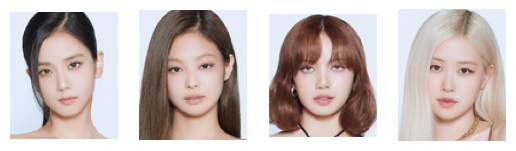

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

def save_faces(img, result_list, output_folder):
    # Check if the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save each face as a separate image
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face image
        face_image = img[y1:y2, x1:x2]

        # Save the face image to a file
        output_path = os.path.join(output_folder, f"face_{i+1}.jpg")
        cv2.imwrite(output_path, cv2.cvtColor(face_image, cv2.COLOR_RGB2BGR))

# Example usage
output_folder = "/content/gdrive/MyDrive/야이콘_NAMAN"
draw_faces(img, faces_copy)
save_faces(img, faces_copy, output_folder)

# Verification

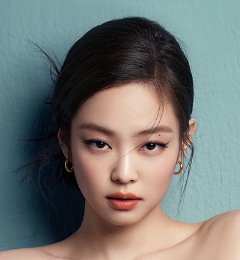

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:06<00:00, 13.5MB/s]


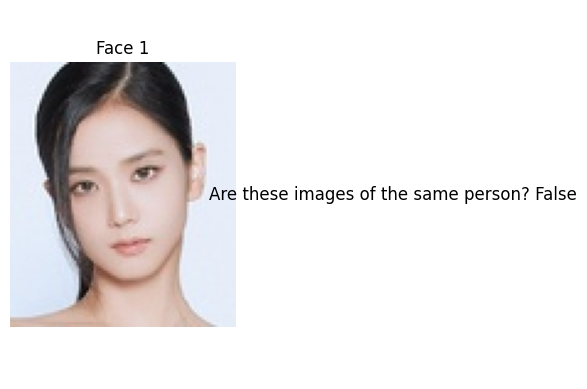

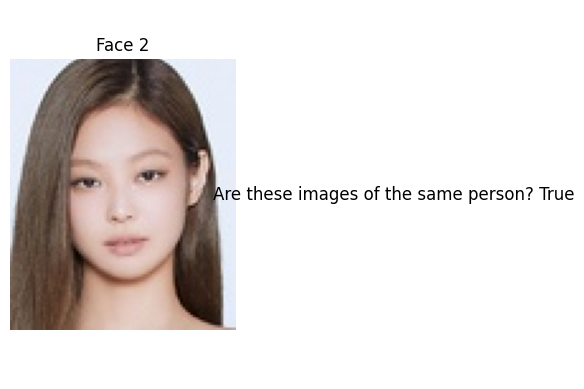

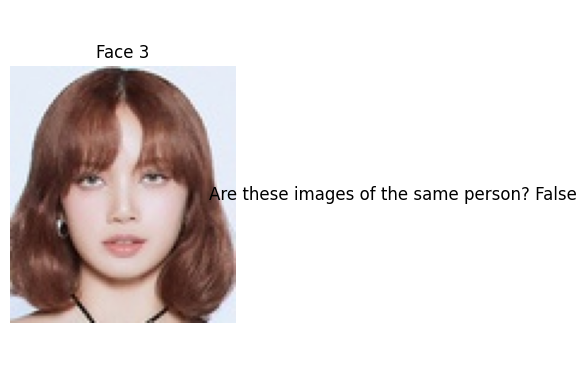

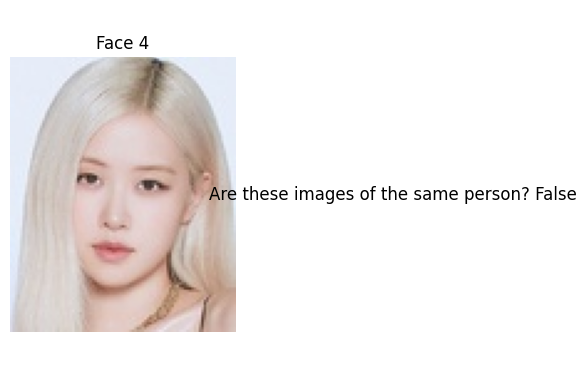

2


In [19]:
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt

detected_face = 0  # Declare as a global variable

def compare_faces(img1, img2, model_name="Facenet", enforce_detection=True):
    # Face verification
    verification = DeepFace.verify(img1, img2, model_name=model_name, enforce_detection=enforce_detection)

    return verification["verified"]

def draw_and_compare_faces(img_folder, sample_img_path, model_name="Facenet", enforce_detection=True):
    global detected_face  # Declare as a global variable

    # Load the sample image
    sample_img = cv2.imread(sample_img_path)

    # Iterate through face images in the folder
    for i in range(1, len(faces)+1):  # Assuming face images are named face_1.jpg, face_2.jpg, ..., face_10.jpg
        face_img_path = os.path.join(img_folder, f"face_{i}.jpg")

        # Check if the face image file exists
        if os.path.isfile(face_img_path):
            face_img = cv2.imread(face_img_path)

            # Display the face image
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"Face {i}")

            try:
                # Compare the face with the sample image
                is_same_person = compare_faces(face_img, sample_img, model_name=model_name, enforce_detection=enforce_detection)

                if is_same_person:
                    detected_face = i

                # Display the result
                plt.subplot(1, 2, 2)
                plt.text(0.5, 0.5, f"Are these images of the same person? {is_same_person}", horizontalalignment='center', verticalalignment='center', fontsize=12)
                plt.axis('off')

            except ValueError as e:
                # Handle face detection failure
                plt.subplot(1, 2, 2)
                plt.text(0.5, 0.5, "Face detection failed", horizontalalignment='center', verticalalignment='center', fontsize=12)
                plt.axis('off')

            # Show the plot
            plt.show()

# Example usage
img_folder = "/content/gdrive/MyDrive/야이콘_NAMAN"
sample_img_path = "/content/gdrive/MyDrive/야이콘_NAMAN/jennie.png"

# Reading the image
sample = cv2.imread('/content/gdrive/MyDrive/야이콘_NAMAN/jennie.png')
cv2_imshow(sample)

draw_and_compare_faces(img_folder, sample_img_path)

print(detected_face)

In [20]:
print(faces_copy[detected_face])

{'box': [125, 154, 94, 107], 'confidence': 0.9948697090148926, 'keypoints': {'left_eye': (158, 201), 'right_eye': (184, 200), 'nose': (172, 216), 'mouth_left': (163, 227), 'mouth_right': (182, 227)}}


{'box': [125, 154, 94, 107], 'confidence': 0.9948697090148926, 'keypoints': {'left_eye': (158, 201), 'right_eye': (184, 200), 'nose': (172, 216), 'mouth_left': (163, 227), 'mouth_right': (182, 227)}}


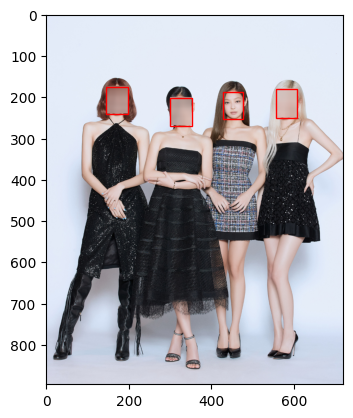

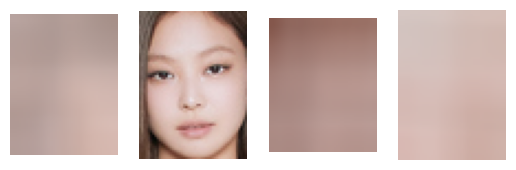

In [22]:
from mtcnn.mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches


img = plt.imread('/content/gdrive/MyDrive/야이콘_NAMAN/BLACKBING.jpg')


# 이미지 복사
img_copy = img.copy()

# Create figure and axes
fig, ax = plt.subplots()
print(faces_copy[detected_face])

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    if i != detected_face-1:
        roi = img_copy[y:y+h, x:x+w]
        roi = cv2.blur(roi, (50, 50))
        # impose this blurred image on the original image to get the final image
        img_copy[y:y+h, x:x+w] = roi

# Display the image
ax.imshow(img_copy)

plt.show()

draw_faces(img_copy, faces)

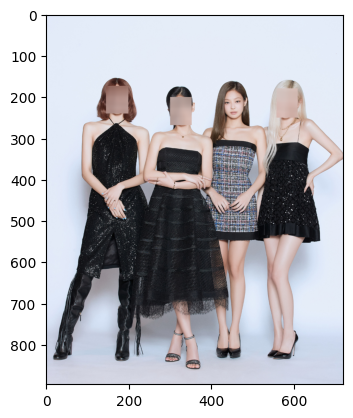

In [23]:
plt.imshow(img_copy)

toonify style

In [25]:
%cd /content/gdrive/MyDrive/야이콘_NAMAN/SOAT

/content/gdrive/.shortcut-targets-by-id/1OM74FNV_QY5_-qwWTHQJmuml4Ty-EkVs/SOAT


In [26]:
!pip install kornia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 11.8 MB/s eta 0:00:00


In [27]:
import os
import torch
import numpy as np

import matplotlib.pyplot as plt
from model import Generator
from util import *

plt.rcParams['figure.dpi'] = 150

In [29]:
device = 'cuda'

generator1 = Generator(256, 512, 8, channel_multiplier=2).eval().to(device)
generator2 = Generator(256, 512, 8, channel_multiplier=2).to(device).eval()

mean_latent1 = load_model(generator1, 'face.pt')
mean_latent2 = load_model(generator2, '/content/gdrive/MyDrive/야이콘_NAMAN/SOAT/latest.pt')

print(len(mean_latent1))
print(mean_latent1[0].shape)

20
torch.Size([1, 512])


In [31]:
!pip install lpips

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.0 MB/s eta 0:00:00


In [32]:
!python projector.py /content/gdrive/MyDrive/야이콘_NAMAN/face_1.jpg
!python projector.py /content/gdrive/MyDrive/야이콘_NAMAN/face_2.jpg
!python projector.py /content/gdrive/MyDrive/야이콘_NAMAN/face_3.jpg
!python projector.py /content/gdrive/MyDrive/야이콘_NAMAN/face_4.jpg

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [on]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:06<00:00, 91.7MB/s]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/vgg.pth
perceptual: 2.2987; mse: 0.0227; gaussian: 1.0924 lr: 0.0000

In [43]:
truncation = .5
with torch.no_grad():
    # torch.manual_seed(face_seed)
    # source_code = torch.randn([1, 512]).to(device)
    # latent1 = generator1.get_latent(source_code, truncation=truncation, mean_latent=mean_latent1)
    latent1 = load_source(['face_1'], generator2, device)
    latent2 = load_source(['face_2'], generator2, device)
    latent3 = load_source(['face_3'], generator2, device)
    latent4 = load_source(['face_4'], generator2, device)


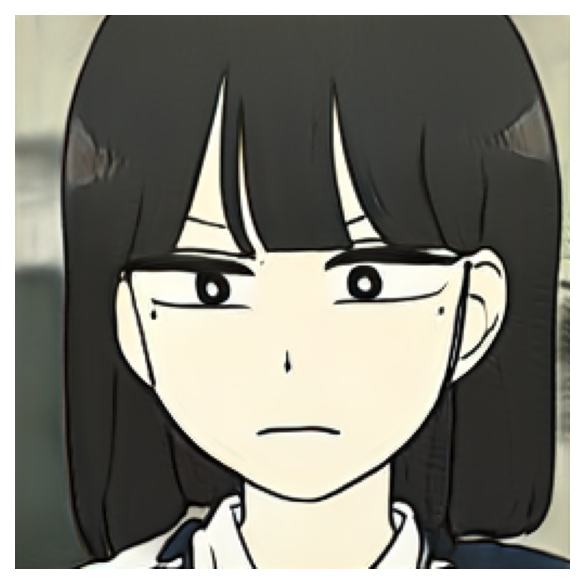

In [46]:
with torch.no_grad():
    reference_code = torch.randn([1, 512]).to(device)
    latent5 = generator2.get_latent(reference_code, truncation=truncation, mean_latent=mean_latent2)
    reference_im, _ = generator2(latent5)
    display_image(reference_im)

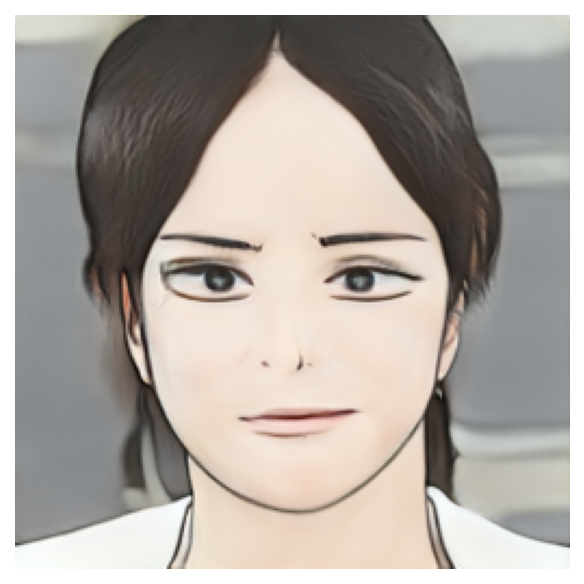

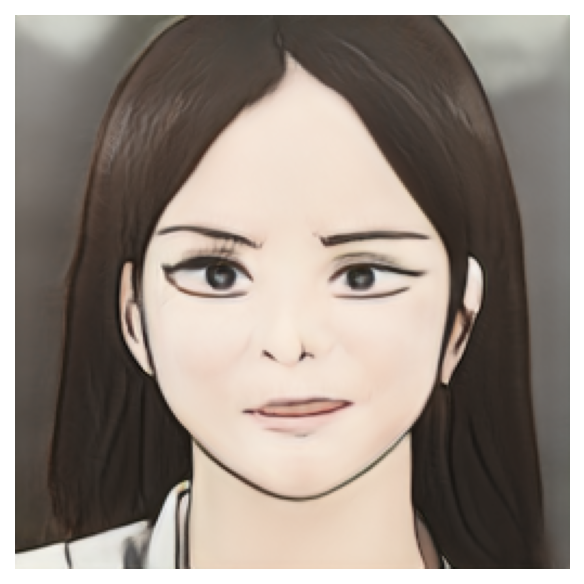

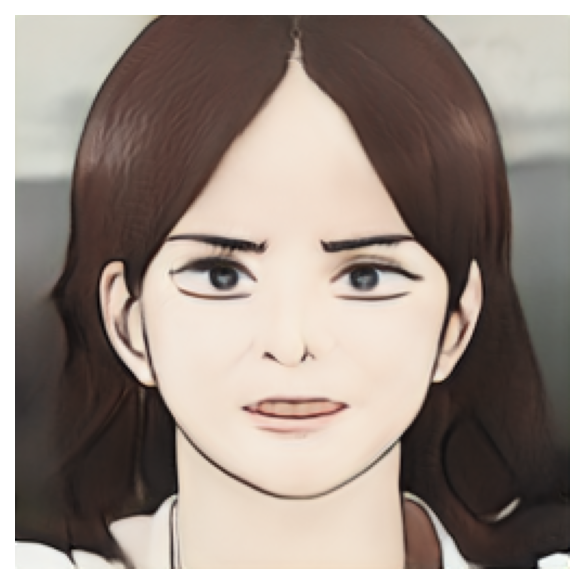

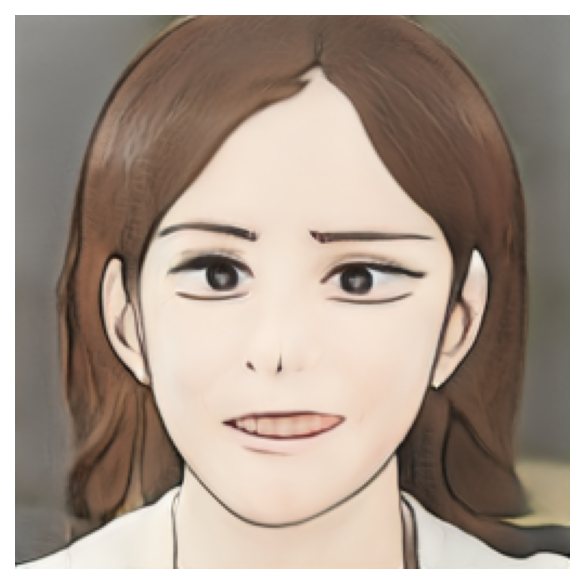

In [47]:
num_swap =  6
alpha =  0.5

early_alpha = 0

def toonify(latent1, latent2):
    with torch.no_grad():
        noise1 = [getattr(generator1.noises, f'noise_{i}') for i in range(generator1.num_layers)]
        noise2 = [getattr(generator2.noises, f'noise_{i}') for i in range(generator2.num_layers)]

        out1 = generator1.input(latent1[0])
        out2 = generator2.input(latent2[0])
        out = (1-early_alpha)*out1 + early_alpha*out2

        out1, _ = generator1.conv1(out, latent1[0], noise=noise1[0])
        out2, _ = generator2.conv1(out, latent2[0], noise=noise2[0])
        out = (1-early_alpha)*out1 + early_alpha*out2

        skip1 = generator1.to_rgb1(out, latent1[1])
        skip2 = generator2.to_rgb1(out, latent2[1])
        skip = (1-early_alpha)*skip1 + early_alpha*skip2

        i = 2
        for conv1_1, conv1_2, noise1_1, noise1_2, to_rgb1, conv2_1, conv2_2, noise2_1, noise2_2, to_rgb2 in zip(
            generator1.convs[::2], generator1.convs[1::2], noise1[1::2], noise1[2::2], generator1.to_rgbs,
            generator2.convs[::2], generator2.convs[1::2], noise2[1::2], noise2[2::2], generator2.to_rgbs
        ):


            conv_alpha = early_alpha if i < num_swap else alpha
            out1, _ = conv1_1(out, latent1[i], noise=noise1_1)
            out2, _ = conv2_1(out, latent2[i], noise=noise2_1)
            out = (1-conv_alpha)*out1 + conv_alpha*out2
            i += 1

            conv_alpha = early_alpha if i < num_swap else alpha
            out1, _ = conv1_2(out, latent1[i], noise=noise1_2)
            out2, _ = conv2_2(out, latent2[i], noise=noise2_2)
            out = (1-conv_alpha)*out1 + conv_alpha*out2
            i += 1

            conv_alpha = early_alpha if i < num_swap else alpha
            skip1 = to_rgb1(out, latent1[i], skip)
            skip2 = to_rgb2(out, latent2[i], skip)
            skip = (1-conv_alpha)*skip1 + conv_alpha*skip2

            i += 1

    image = skip.clamp(-1,1)

    return image
result_dict = {}
for i in range(1,5):
  latent_name = 'latent{}'.format(i)
  result = toonify(locals()[latent_name], latent5)
  display_image(result)
  result_dict[i]=result

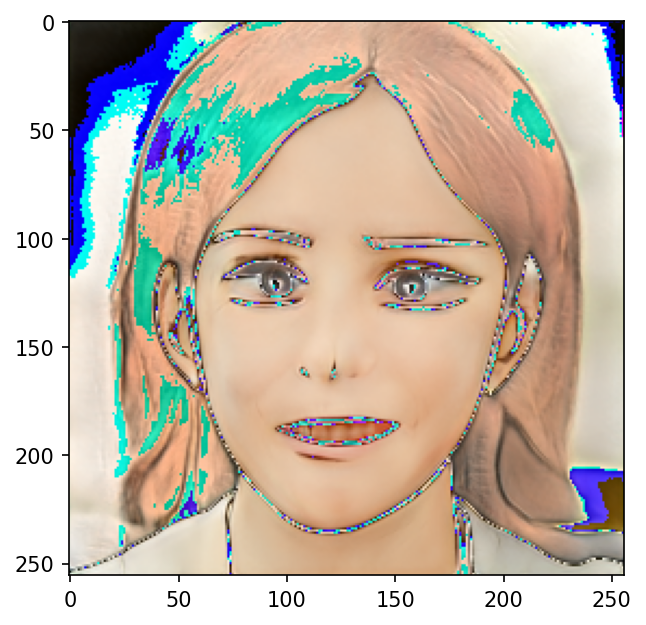

In [76]:
from torchvision import transforms
result_dict[1].shape
#Tensor를 이미지 파일로 변환
transform_to_pil = transforms.ToPILImage()
image_pil = transform_to_pil(result_dict[4][0].cpu())
image_pil.save('face4char.png')
# 이미지 파일을 plt.imread()로 읽기
image_read = plt.imread('face4char.png')

# 결과 확인
plt.imshow(image_read)
plt.show()

In [70]:
!pip install scipy

{'box': [125, 154, 94, 107], 'confidence': 0.9948697090148926, 'keypoints': {'left_eye': (158, 201), 'right_eye': (184, 200), 'nose': (172, 216), 'mouth_left': (163, 227), 'mouth_right': (182, 227)}}


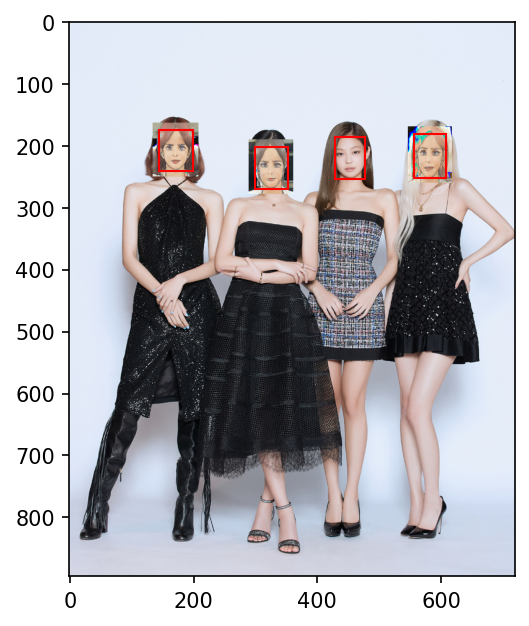

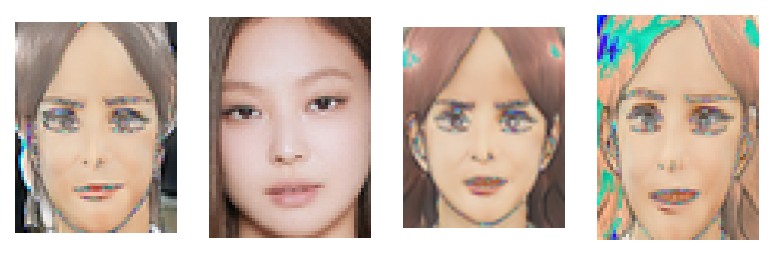

In [80]:
from mtcnn.mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

img = plt.imread('/content/gdrive/MyDrive/야이콘_NAMAN/BLACKBING.jpg')

# 이미지 복사
img_copy = img.copy()

# Create figure and axes
fig, ax = plt.subplots()
print(faces_copy[detected_face])

for i, face in enumerate(faces):
    x, y, w, h = face['box']
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    if i != detected_face-1:
        #resize
        img_path = f'/content/gdrive/MyDrive/야이콘_NAMAN/SOAT/face{i+1}char.png'
        image = Image.open(img_path)
        new_size = (w+20,h+20)
        # resized_array = zoom(image_read, (new_size[0] / image_read.shape[0], new_size[1] / image_read.shape[1], 1))
        resized_image = image.resize(new_size, Image.ANTIALIAS)
        # impose this blurred image on the original image to get the final image
        img_copy[y-10:y+h+10, x-10:x+w+10] = resized_image
# Display the image
ax.imshow(img_copy)

plt.show()

draw_faces(img_copy, faces)


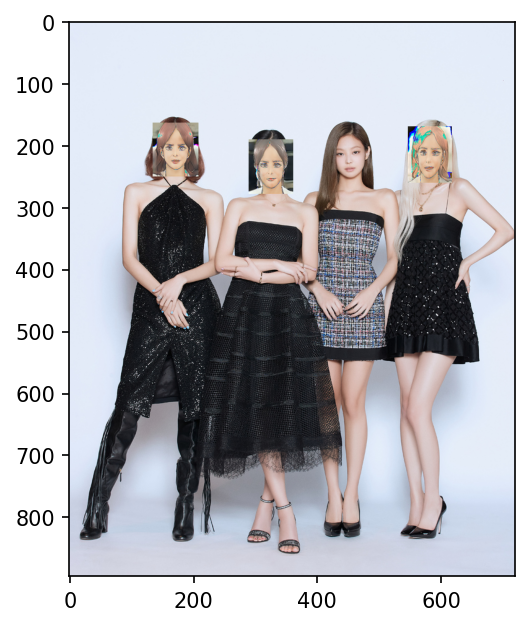

In [81]:
plt.imshow(img_copy)